In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_matriculas.xlsx")

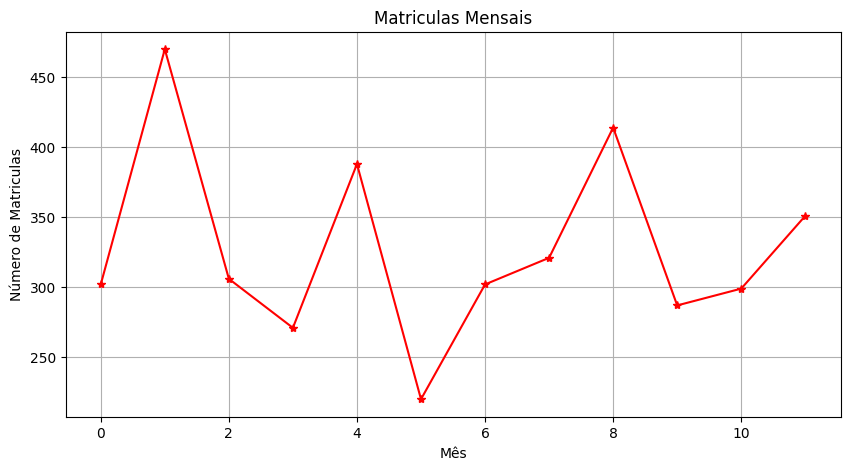

In [3]:
# Gráfico de matriculas mensais

plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='*', linestyle='-', color='red')
plt.title('Matriculas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Matriculas')
plt.grid(True)
plt.show()

In [4]:
# Identificando o mês com maior e menor número de matriculas
maior_matricula = df['Matrículas'].max()
indice_maior = df['Matrículas'].idxmax()

menor_matricula = df['Matrículas'].min()
indice_menor = df['Matrículas'].idxmin()

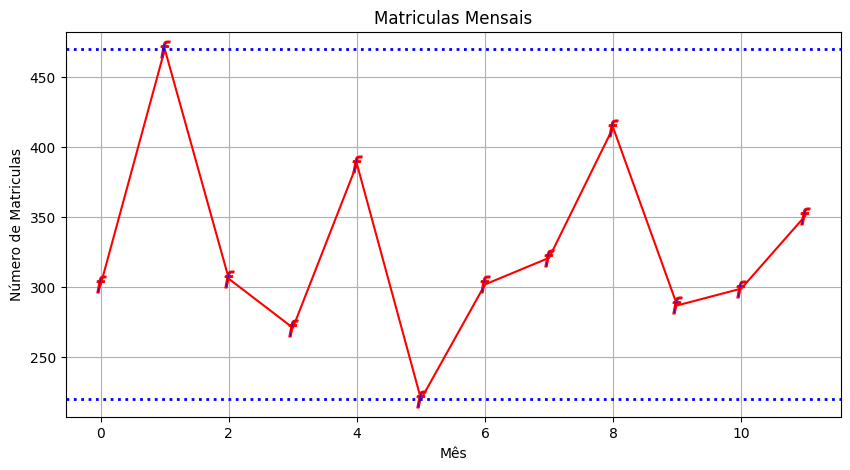

In [5]:
plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='$f$', linestyle='-', color='red', label='Matrículas', mfc='blue', markersize=12)
plt.axhline(y=maior_matricula, color='blue', linestyle=':', linewidth=2, label=f"Máximo: {maior_matricula}")
plt.axhline(y=menor_matricula, color='blue', linestyle=':', linewidth=2, label=f"Mínimo: {menor_matricula}")
plt.title('Matriculas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Matriculas')
plt.grid(True)
plt.show()

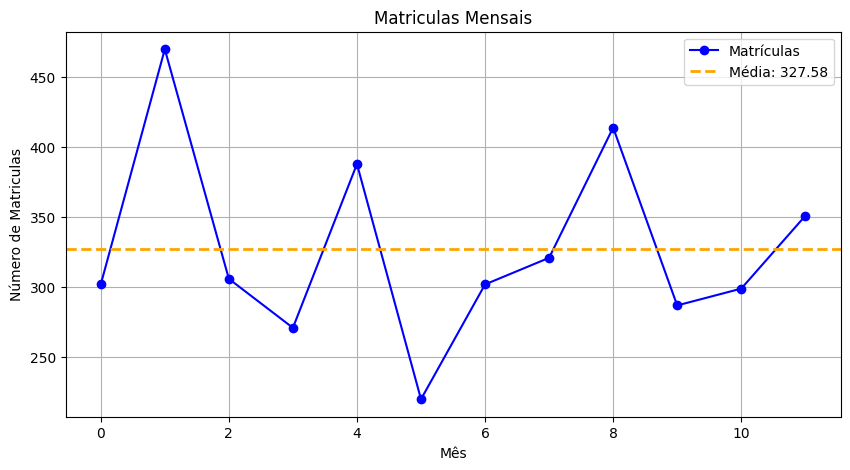

In [6]:
# Calculo da média 
media_matricula = df['Matrículas'].mean()

# Plotação do gráfico de matriculas mensais com destaque da média
plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', linestyle='-', color='blue', label='Matrículas')
# Linha de destaque
plt.axhline(y=media_matricula, color='orange', linestyle='--', linewidth=2, label=f'Média: {media_matricula:.2f}')
plt.title('Matriculas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Matriculas')
plt.grid(True)
plt.legend()
plt.show()

## Tendências

QE / Trimestre<br/>
QS / Semestre<br/>
Q / Quadrimestre<br/>
A / Anual<br/>
D / Diário<br/>
W / Semanal<br/>
H / Horário

In [7]:
# Calcular a média das matrículas por trimestre

# Passo 1. Converter a coluna para datetime
df['Mês'] = pd.to_datetime(df['Mês'])

# Passo 2. Definir a coluna de datas como índice
df.set_index(df['Mês'], inplace=True)

# Passo 3. Calcular a media trimestral
media_trimestral = df['Matrículas'].resample('QE').mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


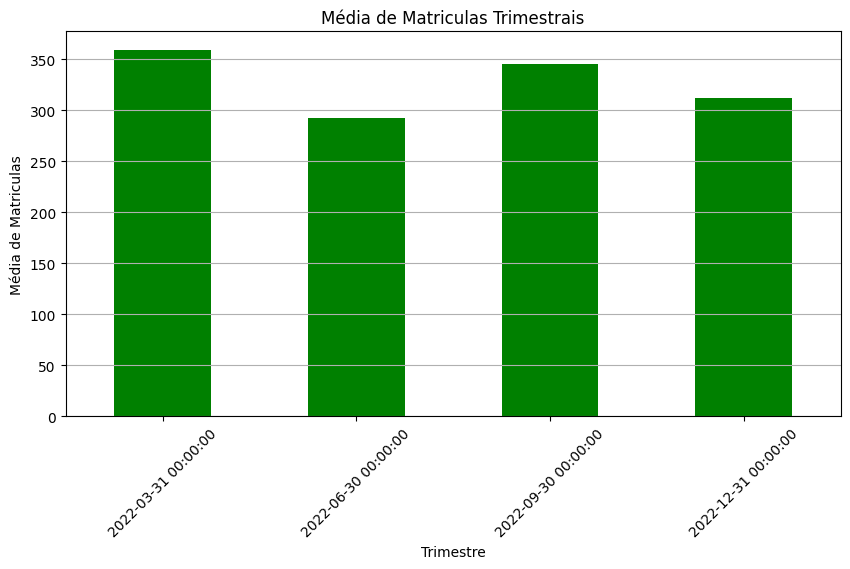

In [8]:
plt.figure(figsize=(10, 5))
media_trimestral.plot(kind='bar', color='green')
plt.title('Média de Matriculas Trimestrais')
plt.xlabel('Trimestre')
plt.ylabel('Média de Matriculas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [9]:
# Desvio Padrão
# Passo 1. Calcular a média do total

# Passo 2. Calcula o desvio em relação a média



In [10]:
# Desvio padrão
df['Matrículas'].std()

# Desvio simples
df['Matrículas'] - df['Matrículas'].mean()

Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

## Variância

In [11]:
# Passo 1. Valor de desvio elevado a 2
# Passo 2. Média do desvio elevado

In [12]:
# Calcular de variação padrão

variacao = df['Matrículas'].pct_change() 

# Calcular a variação percentual mensal

variacao = df['Matrículas'].pct_change() * 100

In [17]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    'Matrícula': df['Matrículas'],
    'Variação Percentual %': variacao
})

def colorir_variacao(valor):
    if valor > 0:
        color = 'green'
    elif valor < 0:
        color = 'red'
    else:
        color = 'blue'
    return f'color: {color}'

tabela_variacao.style.map(colorir_variacao, subset=['Variação Percentual %'])

,Matrícula,Variação Percentual %
Mês,,
2022-01-31 00:00:00,302,nan
2022-02-28 00:00:00,470,55.629139
2022-03-31 00:00:00,306,-34.893617
2022-04-30 00:00:00,271,-11.437908
2022-05-31 00:00:00,388,43.173432
2022-06-30 00:00:00,220,-43.298969
2022-07-31 00:00:00,302,37.272727
2022-08-31 00:00:00,321,6.291391
2022-09-30 00:00:00,414,28.971963
